In [1]:
# importing libraries

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_excel("PTA.xlsx")
df.head(15)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0,8
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3,12
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1,1
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0,10
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [4]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [5]:
df.dtypes

UserID                                            int64
Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                        int64
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

In [6]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

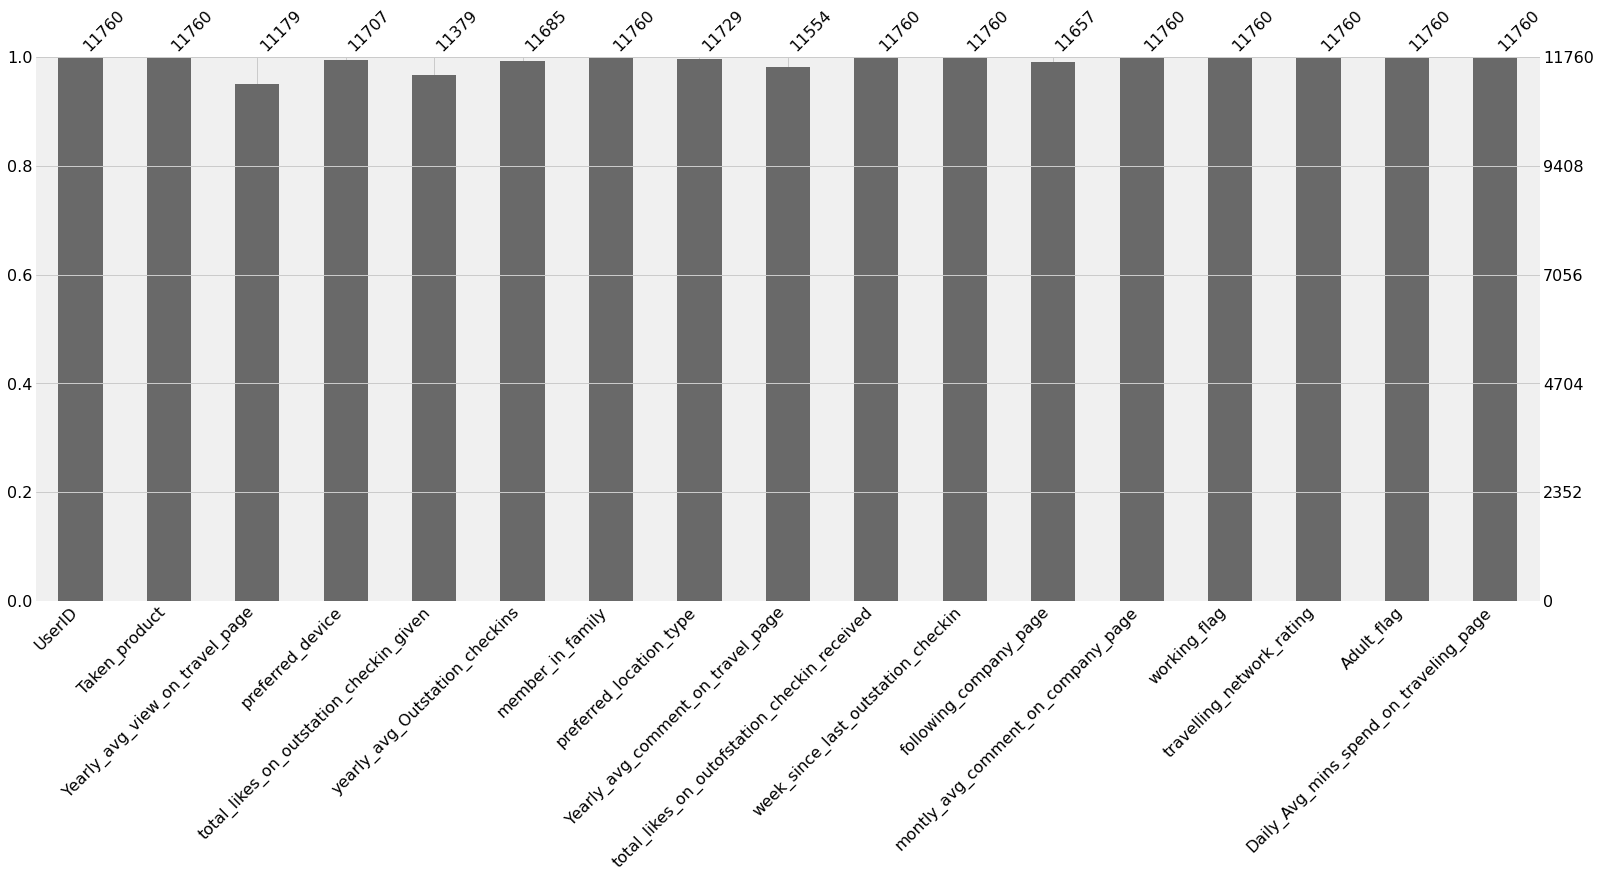

In [7]:
msno.bar(df)
plt.show()

In [8]:
df.drop('UserID', axis = 1, inplace = True)

### Encoding the Catergorical Values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Taken_product'] = le.fit_transform(df['Taken_product'])
df['preferred_device'] = le.fit_transform(df['preferred_device'])
df['preferred_location_type'] = le.fit_transform(df['preferred_location_type'])
df['working_flag'] = le.fit_transform(df['working_flag'])

In [10]:
df['following_company_page'].value_counts()

No     8355
Yes    3285
1        12
0         5
Name: following_company_page, dtype: int64

In [11]:
df['member_in_family'].value_counts()

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [12]:
df['yearly_avg_Outstation_checkins'].value_counts()

1     4543
2      844
10     682
9      340
3      336
7      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
23     215
29     215
18     208
15     206
20     199
26     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

In [13]:
df['following_company_page'] = df['following_company_page'].replace('Yes',1)
df['following_company_page'] = df['following_company_page'].replace('No',0)
df['member_in_family'] = df['member_in_family'].replace('Three',3)
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].replace('*',1)

In [14]:
df = df.fillna(df.median())

In [15]:
df.corr()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
Taken_product,1.000000,-0.149868,0.004141,-0.054193,0.075817,-0.032282,0.025348,-0.005465,-0.159824,0.044725,0.244244,0.000611,0.002889,-0.045872,-0.137145,-0.143220
Yearly_avg_view_on_travel_page,-0.149868,1.000000,-0.015750,0.010511,0.008716,0.191293,-0.040980,0.041777,0.484846,0.278970,0.029816,-0.009498,0.005257,0.056211,0.036837,0.580170
preferred_device,0.004141,-0.015750,1.000000,0.001966,-0.066803,0.004856,0.117375,-0.047121,0.024597,0.011673,0.011260,0.014796,-0.021698,-0.027631,-0.015100,0.024164
total_likes_on_outstation_checkin_given,-0.054193,0.010511,0.001966,1.000000,0.006155,-0.012493,0.004717,0.011995,0.012275,0.034838,0.013623,0.012437,-0.000290,0.010277,0.039411,0.008914
yearly_avg_Outstation_checkins,0.075817,0.008716,-0.066803,0.006155,1.000000,0.016956,-0.017309,0.046789,-0.012067,-0.033406,0.028269,-0.001651,0.023780,0.004413,0.047858,0.006752
member_in_family,-0.032282,0.191293,0.004856,-0.012493,0.016956,1.000000,-0.002878,0.006398,0.093035,0.111187,-0.018240,-0.008773,-0.025449,-0.011534,0.017422,0.122344
preferred_location_type,0.025348,-0.040980,0.117375,0.004717,-0.017309,-0.002878,1.000000,-0.067914,-0.007685,-0.000348,0.010985,0.004911,-0.007917,0.011558,0.003145,-0.003496
Yearly_avg_comment_on_travel_page,-0.005465,0.041777,-0.047121,0.011995,0.046789,0.006398,-0.067914,1.000000,-0.013858,0.059039,-0.007972,0.019161,-0.004871,0.007093,0.043945,0.059993
total_likes_on_outofstation_checkin_received,-0.159824,0.484846,0.024597,0.012275,-0.012067,0.093035,-0.007685,-0.013858,1.000000,0.144058,0.007761,-0.005137,-0.017088,0.025858,0.005418,0.673410
week_since_last_outstation_checkin,0.044725,0.278970,0.011673,0.034838,-0.033406,0.111187,-0.000348,0.059039,0.144058,1.000000,-0.017813,0.031935,-0.009376,0.051027,0.026155,0.249776


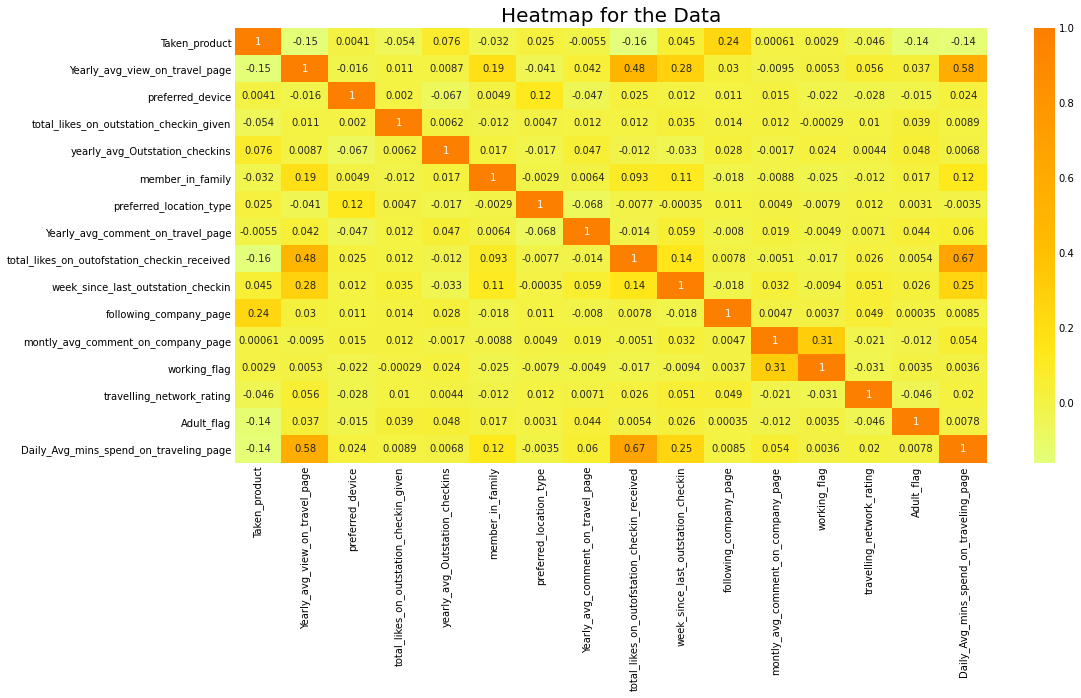

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

### Checking for outliers by using highly correlated features

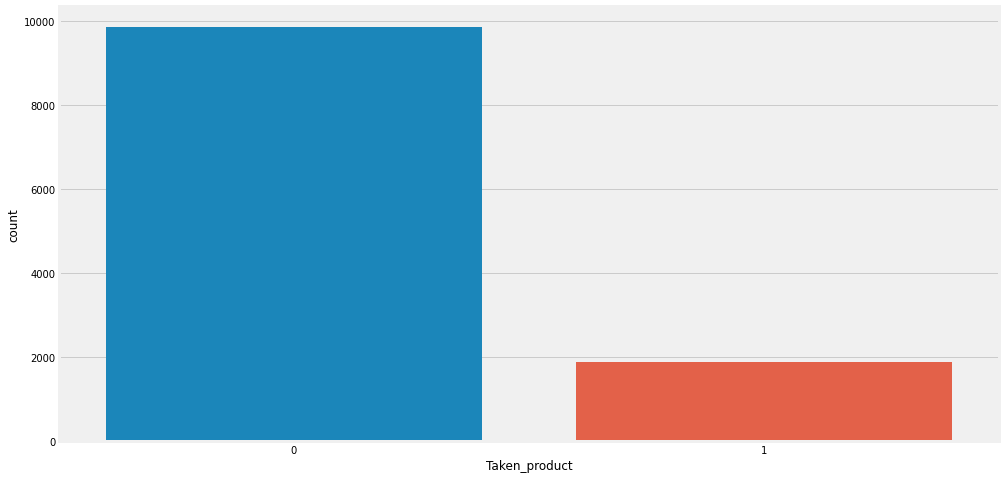

In [17]:
sns.countplot(data=df,x='Taken_product');

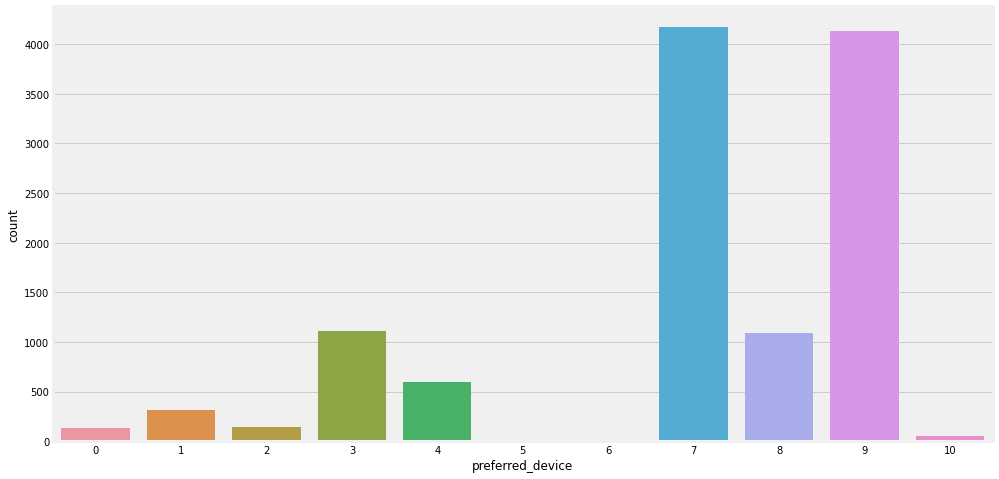

In [18]:
sns.countplot(data=df,x='preferred_device');

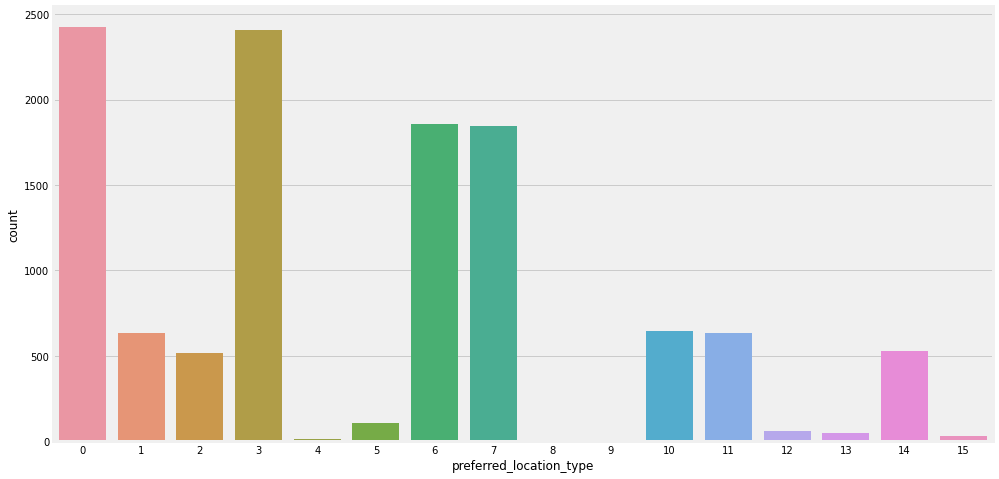

In [19]:
sns.countplot(data=df,x='preferred_location_type');

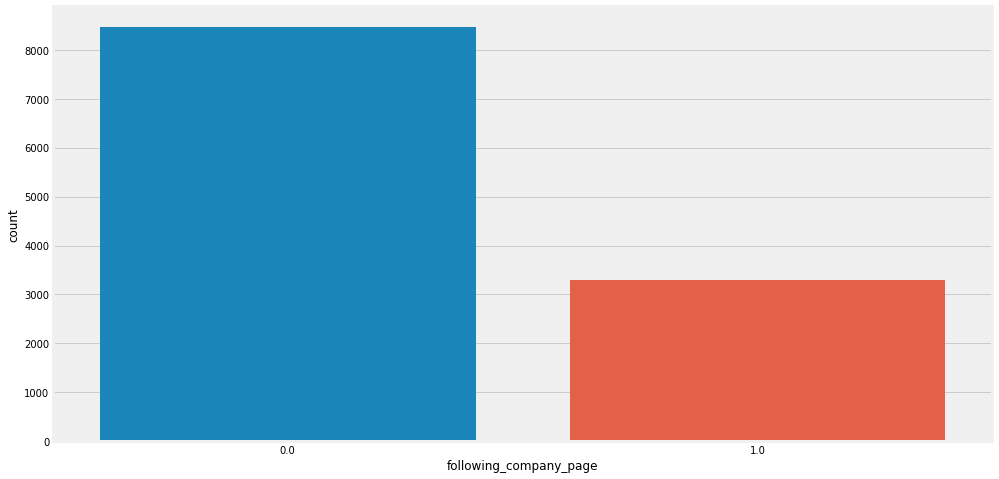

In [20]:
sns.countplot(data=df,x='following_company_page');

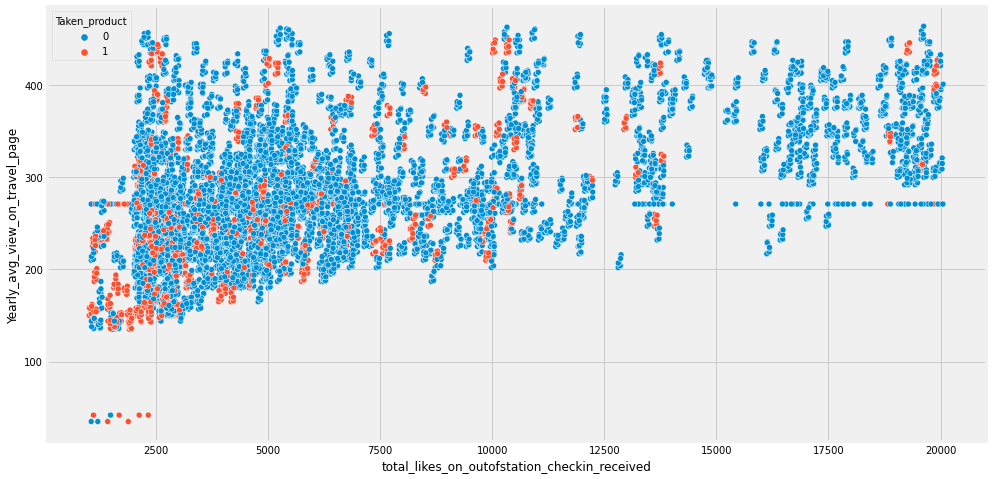

In [21]:
sns.scatterplot(data=df, y="Yearly_avg_view_on_travel_page", x="total_likes_on_outofstation_checkin_received", hue="Taken_product");
#few outliers

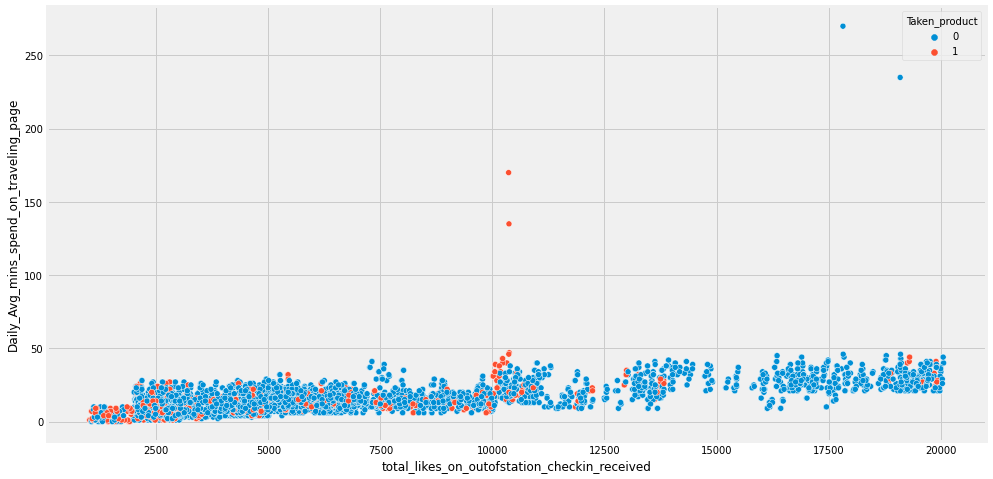

In [22]:
sns.scatterplot(data=df, y="Daily_Avg_mins_spend_on_traveling_page", x="total_likes_on_outofstation_checkin_received", hue="Taken_product");

#Outlier seen

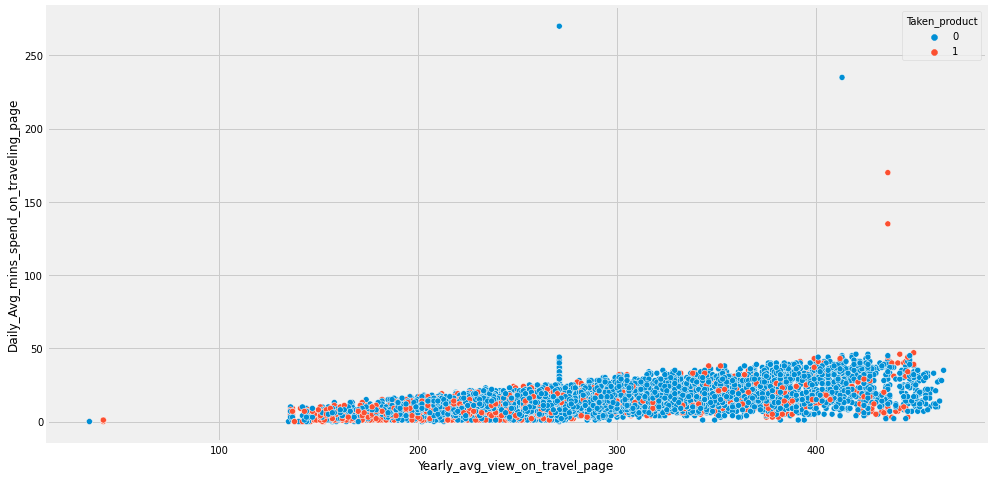

In [23]:
sns.scatterplot(data=df, y="Daily_Avg_mins_spend_on_traveling_page", x="Yearly_avg_view_on_travel_page", hue="Taken_product");

#Outlier seen

#### Median Imputation of Outliers

<AxesSubplot:xlabel='Daily_Avg_mins_spend_on_traveling_page'>

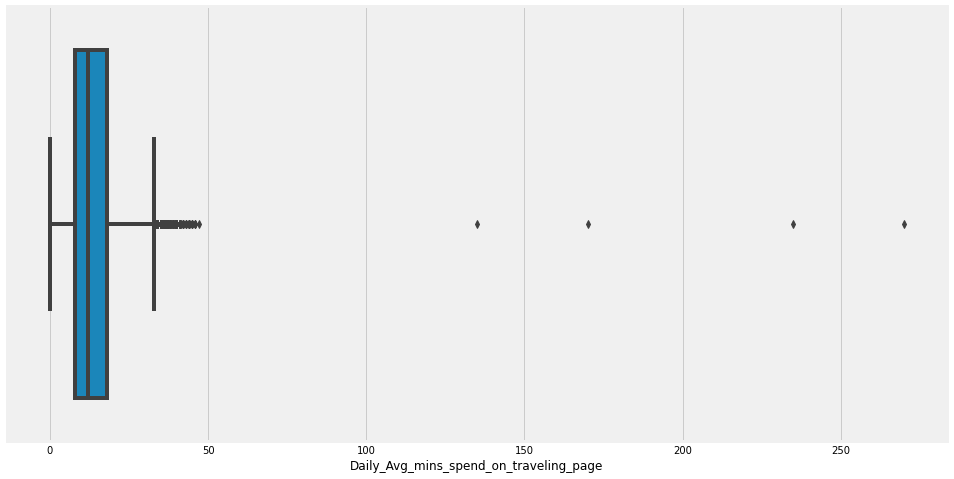

In [24]:
sns.boxplot(df["Daily_Avg_mins_spend_on_traveling_page"])

In [25]:
for i in df["Daily_Avg_mins_spend_on_traveling_page"]:
    q1= df["Daily_Avg_mins_spend_on_traveling_page"].quantile(0.25)
    q3= df["Daily_Avg_mins_spend_on_traveling_page"].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5* iqr
    Upper_tail = q3 + 1.5* iqr
    if i>Upper_tail or i<Lower_tail:
        df["Daily_Avg_mins_spend_on_traveling_page"]= df["Daily_Avg_mins_spend_on_traveling_page"].replace(i,np.median(df["Daily_Avg_mins_spend_on_traveling_page"]))

<AxesSubplot:xlabel='Daily_Avg_mins_spend_on_traveling_page'>

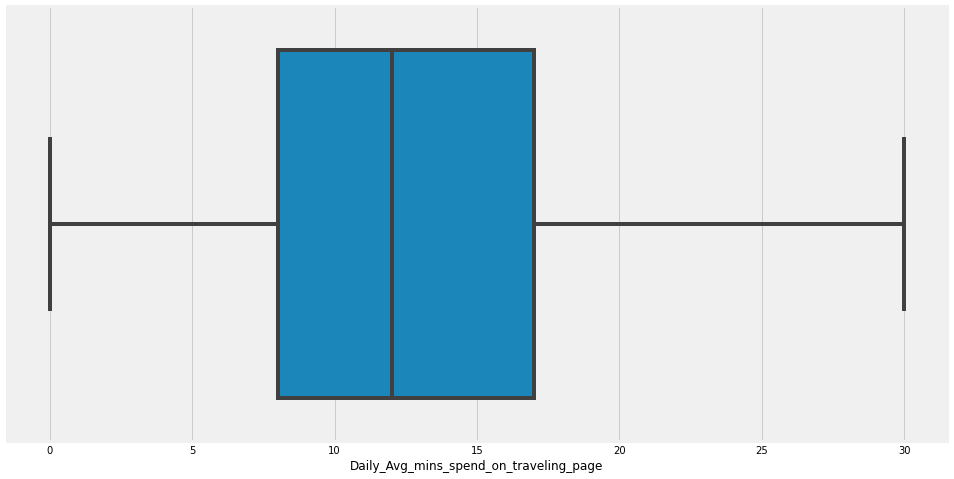

In [26]:
sns.boxplot(df["Daily_Avg_mins_spend_on_traveling_page"])

<AxesSubplot:xlabel='Yearly_avg_view_on_travel_page'>

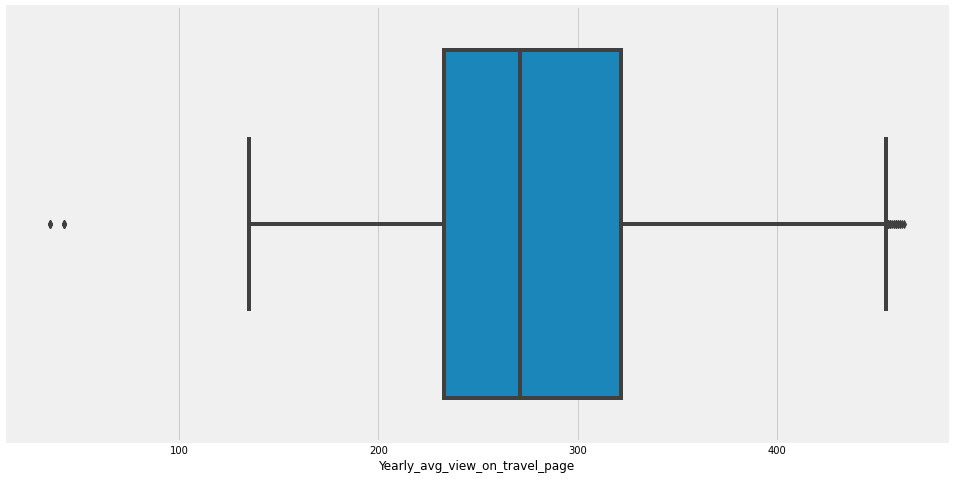

In [27]:
sns.boxplot(df["Yearly_avg_view_on_travel_page"])

In [28]:
for i in df["Yearly_avg_view_on_travel_page"]:
    q1= df["Yearly_avg_view_on_travel_page"].quantile(0.25)
    q3= df["Yearly_avg_view_on_travel_page"].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5* iqr
    Upper_tail = q3 + 1.5* iqr
    if i>Upper_tail or i<Lower_tail:
        df["Yearly_avg_view_on_travel_page"]= df["Yearly_avg_view_on_travel_page"].replace(i,np.median(df["Yearly_avg_view_on_travel_page"]))

<AxesSubplot:xlabel='Yearly_avg_view_on_travel_page'>

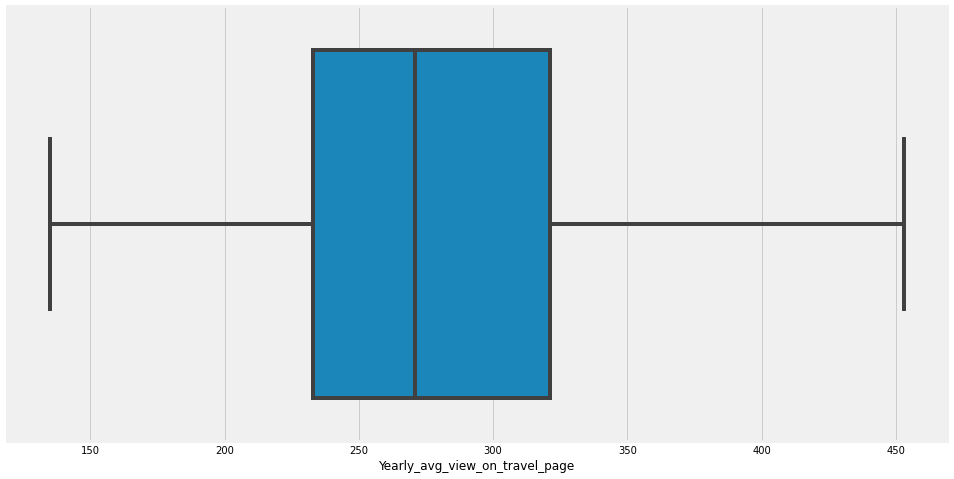

In [29]:
sns.boxplot(df["Yearly_avg_view_on_travel_page"])

# Building our model 

## Trained model without checking imbalance dataset




In [30]:
#target feature
targetFeature=df['Taken_product']
#Train dataset
df = df.drop(["Taken_product"],axis = 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df,targetFeature, test_size=0.3, random_state=42,shuffle =True)

<IPython.core.display.Javascript object>

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train,y_train)
preds = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.9810090702947846


In [33]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train,y_train)
preds = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))


[10:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.9903628117913832


In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,y_train)
preds = adaboost.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.8752834467120182


In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)
preds = lgb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.9778911564625851


## Balancing our dataset wrt to targetFeature

In [36]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(df,targetFeature)

In [37]:
X__train, X__test, y__train, y__test = train_test_split(X,y, test_size=0.3, random_state=42,shuffle =True)

<IPython.core.display.Javascript object>

In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
lgb = LGBMClassifier(random_state=0)
lgb.fit(X__train, y__train)
preds2 = lgb.predict(X__test)
print("Accuracy: ", accuracy_score(y__test, preds2))

Accuracy:  0.9817536746071972


In [39]:
from sklearn.metrics import roc_auc_score
print("Accuracy: ", roc_auc_score(y__test, preds2))

Accuracy:  0.9816979664914698


In [40]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix",confusion_matrix(y__test,preds2))

Confusion Matrix [[2860   70]
 [  38 2951]]


In [41]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X__train,y__train)
preds = adaboost.predict(X__test)
print("Accuracy: ", accuracy_score(y__test, preds2))

Accuracy:  0.9817536746071972


In [42]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X__train,y__train)
preds2 = classifier.predict(X__test)
print("Accuracy: ", accuracy_score(y__test, preds2))

[10:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.9964521033958439
